<a href="https://colab.research.google.com/github/kimdesok/DeepPATH/blob/master/skimage_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##scikit-image is a Python package for image processing. 
It uses NumPy arrays as image objects. 

References: 
1) Scipy Lecture Notes https://scipy-lectures.org/index.html
2) Image processing in Python https://scikit-image.org/


In [ ]:
!pip install av
import skimage
print(skimage.__version__)

     |████████████████████████████████| 36.8 MB 219 kB/s 
0.18.3


<class 'numpy.ndarray'>
(512, 512)
262144


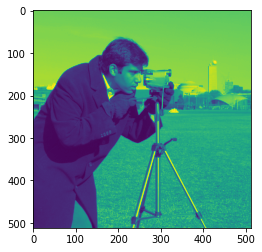

In [ ]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

#Type the image
camera = data.camera()
print(type(camera))

print(camera.shape)
print(camera.size)

fig, ax = plt.subplots()
plt.imshow(camera)



200


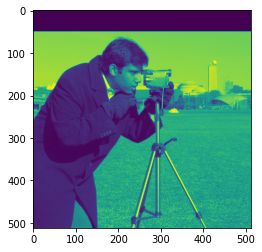

In [ ]:
print(camera[10,20])
camera[:50] = 0
plt.imshow(camera)

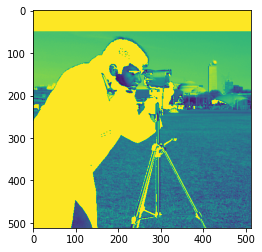

In [ ]:
mask = camera < 87
# Set to "white" (255) the pixels where mask is True
camera[mask] = 255
plt.imshow(camera)

In [ ]:
camera = data.camera()

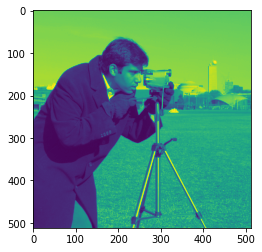

In [ ]:
plt.imshow(camera)

In [ ]:
inds_r = np.arange(len(camera))
inds_c = 4 * inds_r % len(camera)
camera[inds_r, inds_c] = 0

In [ ]:
nrows, ncols = camera.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 >
                   (nrows / 2)**2)
camera[outer_disk_mask] = 255

In [ ]:
lower_half = row > cnt_row
lower_half_disk = np.logical_and(lower_half, outer_disk_mask)
camera = data.camera()
camera[lower_half_disk] = 255

In [ ]:
cat = data.chelsea()
type(cat)

print(cat.shape)
print(cat[10, 20])

# Set the pixel at (50th row, 60th column) to "black"
cat[50, 60] = 0
# set the pixel at (50th row, 61st column) to "green"
cat[50, 61] = [0, 255, 0]  # [red, green, blue]

(300, 451, 3)
[151 129 115]


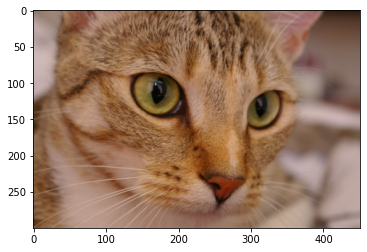

In [ ]:
plt.imshow(cat)

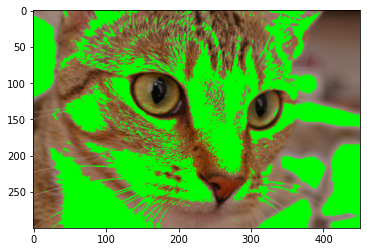

In [ ]:
from skimage import data
cat = data.chelsea()
reddish = cat[:, :, 0] > 160
cat[reddish] = [0, 255, 0]
plt.imshow(cat)

In [ ]:
rng = np.random.default_rng()
im3d = rng.random((100, 100, 100))
from skimage import morphology
from scipy import ndimage as ndi
seeds = ndi.label(im3d < 0.1)[0]
ws = morphology.watershed(im3d, seeds)

/usr/local/lib/python3.7/dist-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  


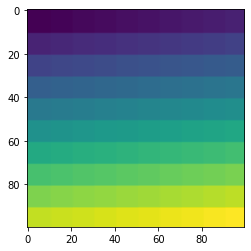

In [ ]:
from skimage import segmentation
slics = segmentation.slic(im3d, spacing=[5, 1, 1])
plt.imshow(slics)

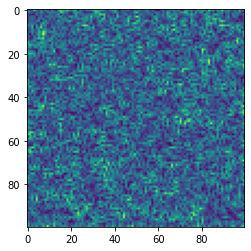

In [ ]:
from skimage import filters
edges = np.empty_like(im3d)
for pln, image in enumerate(im3d):
    # Iterate over the leading dimension
    edges[pln] = filters.sobel(image)
    plt.imshow(edges[pln])

##It is faster to process elements that are next to each other in memory than ones that are scattered, even if the number of operations is the same.

>* When using nested loops, the last/rightmost dimension of the array should be in the innermost loop of the computation.

In [ ]:
def in_order_multiply(array, scalar):
    for plane in list(range(array.shape[0])):
        array[plane, :, :] *= scalar

def out_of_order_multiply(array, scalar):
    for plane in list(range(array.shape[2])):
        array[:, :, plane] *= scalar

import time
rng = np.random.default_rng()
im3d = rng.random((100, 100, 100))
t0 = time.time(); x = in_order_multiply(im3d, 5); t1 = time.time()
print("%.2f seconds" % (t1 - t0))  

s0 = time.time(); x = out_of_order_multiply(im3d, 5); s1 = time.time()
print("%.2f seconds" % (s1 - s0))  

print("Speedup: %.1fx" % ((s1 - s0) / (t1 - t0)))  


0.00 seconds
0.01 seconds
Speedup: 6.3x


These functions convert images to the desired dtype and properly rescale their values:

In [ ]:
from skimage.util import img_as_ubyte, img_as_float
image = np.array([0, 0.5, 1], dtype=float)
image = img_as_ubyte(image)
print(image)

[  0 128 255]


In [ ]:
image = np.array([0, 0.5, 0.503, 1], dtype=float)
print(img_as_ubyte(image))
print(img_as_float(image))

[  0 128 128 255]
[0.    0.5   0.503 1.   ]


physical measurements that should be kept by their ranges

uint8 1 252 (303, 384)
scale by 50%, Range Not Preserved: (dtype('float64'), 0.0157, 0.9114, (152, 192))
scale by 50%, Range Preserved: (dtype('float64'), 4.0, 232.0, (152, 192))


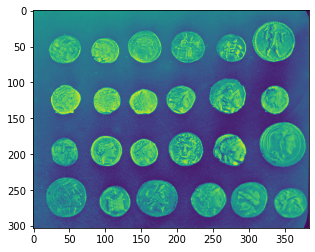

In [ ]:
from skimage import data
from skimage.transform import rescale
image = data.coins()

print(image.dtype, image.min(), image.max(), image.shape)

rescaled = rescale(image, 0.5)
print('scale by 50%, Range Not Preserved:', (rescaled.dtype, np.round(rescaled.min(), 4), np.round(rescaled.max(), 4), rescaled.shape))

rescaled = rescale(image, 0.5, preserve_range=True)
print('scale by 50%, Range Preserved:', (rescaled.dtype, np.round(rescaled.min()), np.round(rescaled.max()), rescaled.shape))

plt.imshow(image)

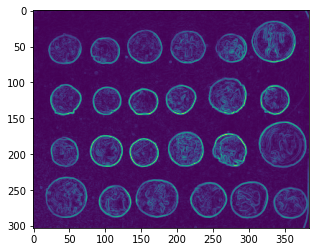

In [ ]:
from skimage.util import img_as_uint
from skimage import filters

out = img_as_float(filters.sobel(image))
plt.imshow(out)


107


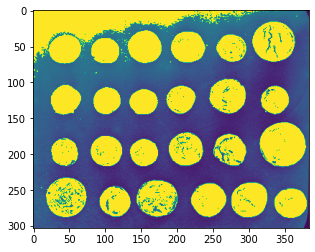

In [ ]:
threshold_value = filters.threshold_otsu(image)
print(threshold_value)
mask = image>threshold_value
image[mask] = 255
plt.imshow(image)

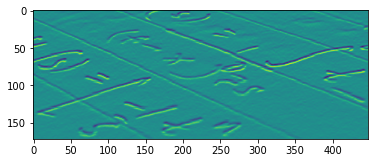

In [ ]:
#Local filter
text = data.text()
hsobel_text = filters.sobel_h(text)
plt.imshow(hsobel_text)

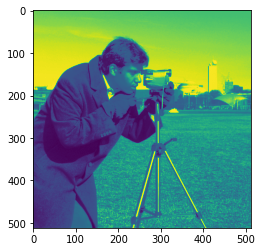

In [ ]:
import skimage.color as color

#Non Local filter
from skimage import exposure
camera = data.camera()
#color.rgb2gray(camera)
camera_equalized = exposure.equalize_hist(camera)
plt.imshow(camera_equalized)

/root/.cache/scikit-image/0.18.3/data


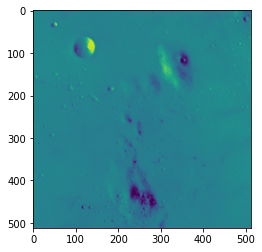

In [ ]:
#Input images
import os
print(skimage.data_dir)
filename = os.path.join(skimage.data_dir, 'moon.png')

from skimage import io
moon = io.imread(filename)
plt.imshow(moon)

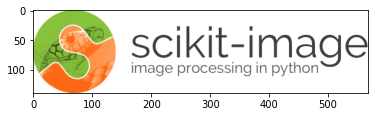

In [ ]:
#URL image paths
logo = io.imread('http://scikit-image.org/_static/img/logo.png')
plt.imshow(logo)

io.imsave('local_logo.png', logo)

##Color manipulation

In [ ]:
# bright saturated red
red_pixel_rgb = np.array([[[255, 0, 0]]], dtype=np.uint8)
print(color.rgb2hsv(red_pixel_rgb))

# darker saturated blue
dark_blue_pixel_rgb = np.array([[[0, 0, 100]]], dtype=np.uint8)
print(color.rgb2hsv(dark_blue_pixel_rgb))

# less saturated pink
pink_pixel_rgb = np.array([[[255, 100, 255]]], dtype=np.uint8)
print(color.rgb2hsv(pink_pixel_rgb))


[[[0. 1. 1.]]]
[[[0.66666667 1.         0.39215686]]]
[[[0.83333333 0.60784314 1.        ]]]


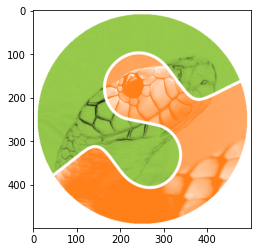

In [ ]:
from skimage.color import rgba2rgb
from skimage import data
img_rgba = data.logo()
plt.imshow(img_rgba)

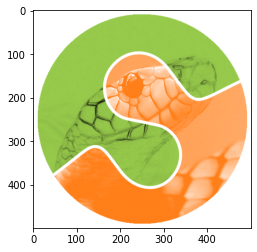

In [ ]:
img_rgb = rgba2rgb(img_rgba)
plt.imshow(img_rgb)

In [ ]:
red_pixel = np.array([[[255, 0, 0]]], dtype=np.uint8)
print(color.rgb2gray(red_pixel))
green_pixel = np.array([[[0, 255, 0]]], dtype=np.uint8)
print(color.rgb2gray(green_pixel))
print('They are different, addressing a different sensitivity of our eyes')

[[0.2125]]
[[0.7154]]
They are different, addressing a different sensitivity of our eyes


In [ ]:
#Mathematical morphology
from skimage import morphology
print(morphology.diamond(1))

a = np.zeros((15,15), dtype=np.uint8)
a[5:10, 6:9] = 1
a[10:12, 8:9] = 1
print(a)

#Erosion
b=morphology.binary_erosion(a, morphology.diamond(1)).astype(np.uint8)
print(b)

b=morphology.binary_erosion(a, morphology.diamond(2)).astype(np.uint8)
print(b)


[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 

In [ ]:
#Closing by a diamond structuring element
b = morphology.binary_dilation(a, morphology.diamond(1)).astype(np.uint8)
print(b)
b = morphology.binary_erosion(b, morphology.diamond(1)).astype(np.uint8)
print(b)

#Opening
b = morphology.binary_erosion(a, morphology.diamond(1)).astype(np.uint8)
print(b)
b = morphology.binary_dilation(b, morphology.diamond(1)).astype(np.uint8)
print(b)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 

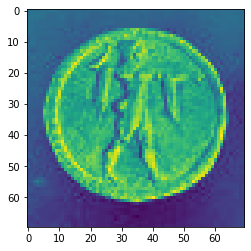

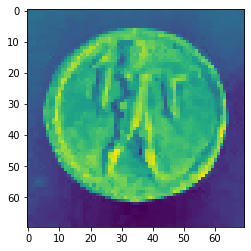

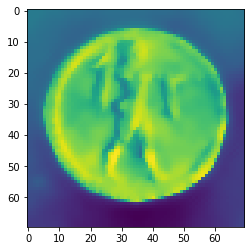

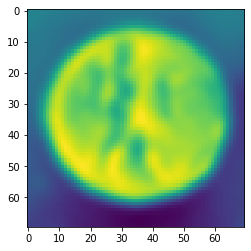

In [ ]:
from skimage.morphology import disk
coins = data.coins()
coins_zoom = coins[10:80, 300:370]
plt.imshow(coins_zoom)
plt.show()

median_coins = filters.median(coins_zoom, disk(1))
plt.imshow(median_coins)
plt.show()

from skimage import restoration
tv_coins = restoration.denoise_tv_chambolle(coins_zoom, weight=0.1)
plt.imshow(tv_coins)
plt.show()

gaussian_coins = filters.gaussian(coins_zoom, sigma=2)
plt.imshow(filters.gaussian(coins_zoom, sigma=2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


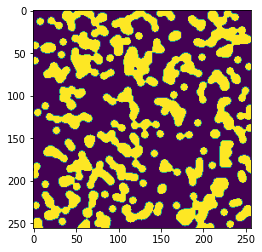

In [ ]:
#labeling connected components of a discrete image
n = 20
l = 256
im = np.zeros((l, l))
points = l * np.random.random((2, n ** 2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = filters.gaussian(im, sigma=l / (4. * n))
blobs = im > im.mean()
plt.imshow(blobs)
plt.show()

78


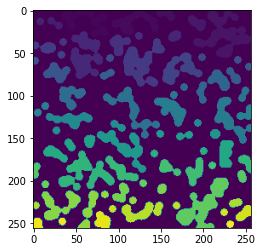

121


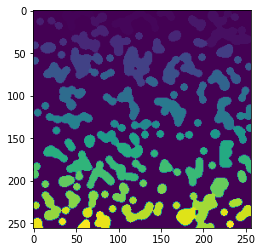

In [ ]:
from skimage import measure
from skimage.feature import peak_local_max
from skimage.morphology import watershed
all_labels, n_labels = measure.label(blobs, return_num=True)
print(n_labels)

plt.imshow(all_labels)
plt.show()

#Alternative way to label after one time erosion and reconstruct 
blobs_eroded = morphology.binary_erosion(blobs, morphology.disk(3)).astype(np.uint8)
all_labels, n_labels = measure.label(blobs_eroded, return_num=True)
all_labels = morphology.dilation(all_labels, morphology.disk(3)).astype(np.uint8)
print(n_labels)
plt.imshow(all_labels)
plt.show()

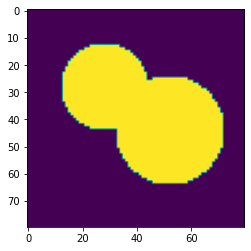

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.


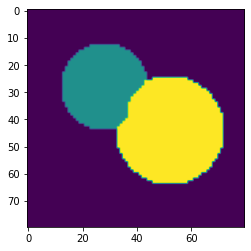

In [ ]:
#Watershed segmentation
#from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage.segmentation import watershed

# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1) ** 2 + (y - y1) ** 2 < r1 ** 2
mask_circle2 = (x - x2) ** 2 + (y - y2) ** 2 < r2 ** 2
image = np.logical_or(mask_circle1, mask_circle2)

plt.imshow(image)
plt.show()

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance
# to the background
from scipy import ndimage
distance = ndimage.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=image)
markers = morphology.label(local_maxi)
labels_ws = watershed(-distance, markers, mask=image)

plt.imshow(labels_ws)
plt.show()

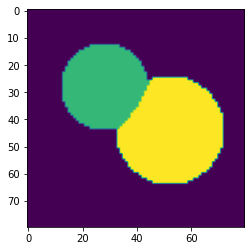

In [ ]:
from skimage import segmentation
# Transform markers image so that 0-valued pixels are to
# be labelled, and -1-valued pixels represent background
markers[~image] = -1
labels_rw = segmentation.random_walker(image, markers)

plt.imshow(labels_rw)
plt.show()

In [ ]:
from skimage import measure
properties = measure.regionprops(labels_rw)

print([prop.area for prop in properties])

print([prop.perimeter for prop in properties])

[770, 1168]
[100.91168824543142, 126.81118318204308]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


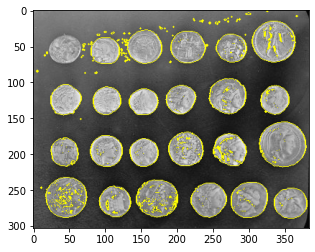

In [ ]:
coins = data.coins()
mask = coins > filters.threshold_otsu(coins)
clean_border = segmentation.clear_border(mask)

coins_edges = segmentation.mark_boundaries(coins, clean_border.astype(np.int))

plt.imshow(coins_edges)
plt.show()

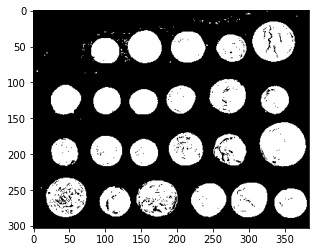

In [ ]:
plt.figure() 

plt.imshow(clean_border, cmap='gray') 

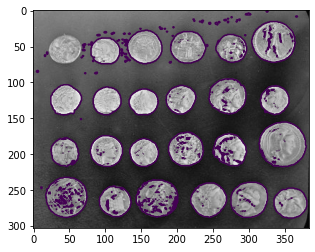

In [ ]:
plt.figure() 

plt.imshow(coins, cmap='gray') 

plt.contour(clean_border, [0.5]) 

In [ ]:
from skimage.viewer import ImageViewer
from skimage.viewer.plugins import lineprofile

coins = data.coins()

#new_viewer = ImageViewer(coins) 

#new_viewer += lineprofile.LineProfile() 

#new_viewer.show() 

In [ ]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform

tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.7, translation=(210, 50))
image = warp(data.checkerboard(), tform.inverse, output_shape=(350, 350))

coords = corner_peaks(corner_harris(image), min_distance=7)
coords_subpix = corner_subpix(image, coords, window_size=15)

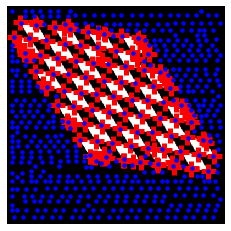

In [ ]:

plt.gray()
plt.imshow(image, interpolation='nearest')
plt.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15, mew=5)
plt.plot(coords[:, 1], coords[:, 0], '.b', markersize=7)
plt.axis('off')
plt.show()


##To use an image created using skimage with OpenCV or vice versa. 
>* OpenCV has three dimensions:w, h, and c.
>* The color scheme is BGR instead of RGB.
>* For the video input, convert it to an Image sequence